# Intializing libraries

In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [36]:
data_path = "/kaggle/input/healthcare/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(data_path)

df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Cleaning Data

**Dropping the 'id' column since it's not useful for prediction and might affect scaling**

In [37]:
df.drop(columns='id', inplace=True)
print("Dataset shape:", df.shape)

Dataset shape: (5110, 11)


**# Getting summary of numerical features**

In [38]:
df.describe()
print("\n")

df.info()
print("\n")

print("Missing values before dropna():")
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Missing values before dropna():
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type     

**Dropping rows with missing values**

In [39]:
df.dropna(inplace=True)

print("Missing values after dropna():")
print(df.isnull().sum())

print("Number of duplicate rows:", df.duplicated().sum())

Missing values after dropna():
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Number of duplicate rows: 0


**Normalizng objects (encoding)**

In [40]:
object_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", object_cols)

le = LabelEncoder()
df[object_cols] = df[object_cols].apply(lambda col: le.fit_transform(col))

df.dtypes

Categorical columns: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

# Scaling

In [41]:
scaler = StandardScaler()
y=df['heart_disease'] #target
x=df.drop('heart_disease',axis=1)
x= scaler.fit_transform(x) 

In [42]:
df.drop('heart_disease',inplace=True,axis=1)           #putting the target column as the last column
df['heart_disease']=y

df.head()

,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,heart_disease
0,1,67.0,0,1,2,1,228.69,36.6,1,1,1
2,1,80.0,0,1,2,0,105.92,32.5,2,1,1
3,0,49.0,0,1,2,1,171.23,34.4,3,1,0
4,0,79.0,1,1,3,0,174.12,24.0,2,1,0
5,1,81.0,0,1,2,1,186.21,29.0,1,1,0


**Spliting data for training**

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("Training feature set size:",x_train.shape)
print("Test feature set size:",x_test.shape)
print("Training label set size:",y_train.shape)
print("Test lable set size:",y_test.shape)

Training feature set size: (3436, 10)
Test feature set size: (1473, 10)
Training label set size: (3436,)
Test lable set size: (1473,)


# Visualisation

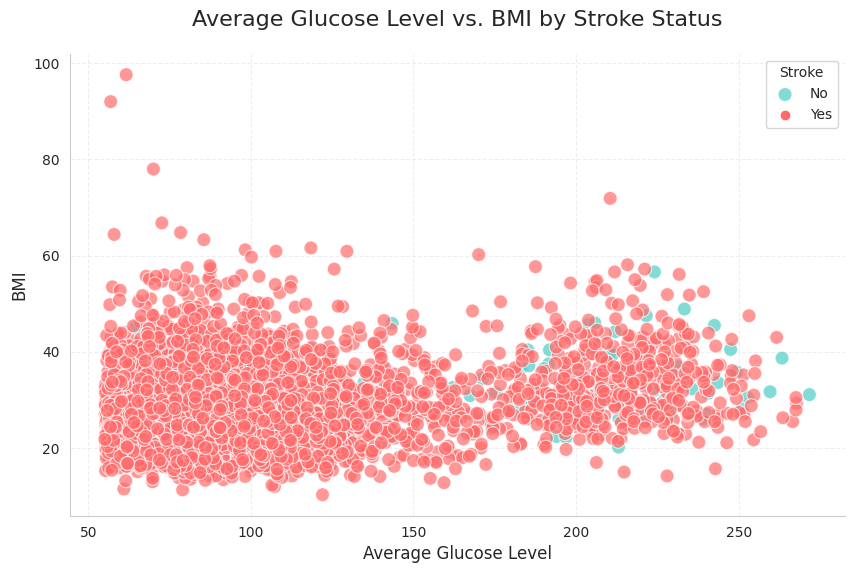

In [55]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='avg_glucose_level', 
    y='bmi', 
    hue='stroke', 
    data=df, 
    palette=colors, 
    alpha=0.7,
    s=100
)
plt.title('Average Glucose Level vs. BMI by Stroke Status', fontsize=16, pad=20)
plt.xlabel('Average Glucose Level', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.legend(title='Stroke', labels=['No', 'Yes'], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)
sns.despine()
plt.show()

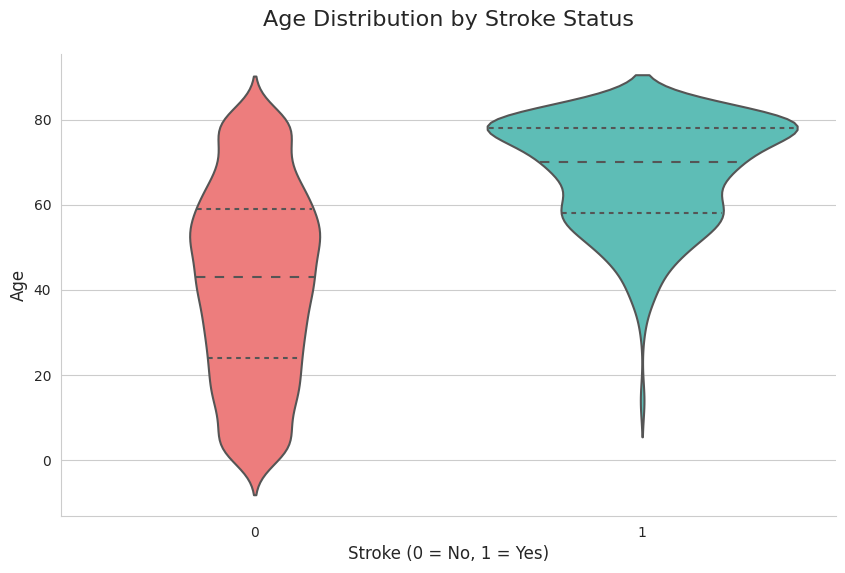

In [52]:
sns.set_style("whitegrid")
colors = ["#FF6B6B", "#4ECDC4"]

plt.figure(figsize=(10, 6))
sns.violinplot(x='stroke', y='age', data=df, palette=colors, inner="quartile")
plt.title('Age Distribution by Stroke Status', fontsize=16, pad=20)
plt.xlabel('Stroke (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.show()

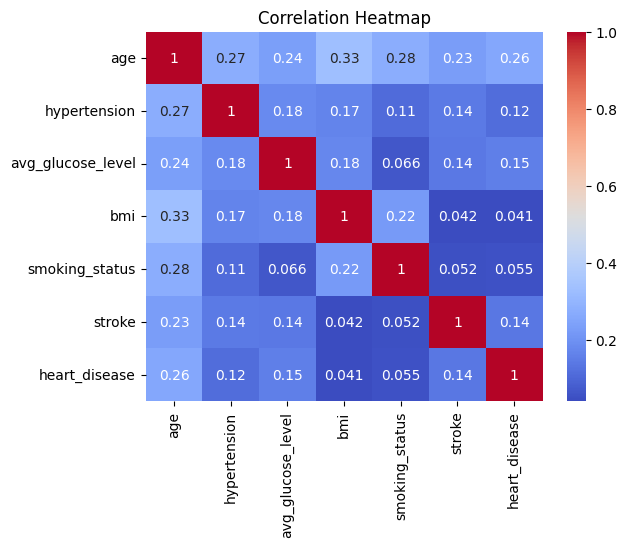

In [46]:
x=df.drop(columns=['gender', 'ever_married', 'work_type', 'Residence_type'])
sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Model Training

In [47]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced')
}
modelName = []
model_accuracy = []

for model_name, model in tqdm( models.items()):
    model.fit(x_train, y_train)
    modelName.append(model_name)
    y_pred = model.predict(x_test)
    model_accuracy.append([
        accuracy_score(y_test, y_pred)
        ,precision_score(y_test, y_pred)
        ,recall_score(y_test, y_pred)
        ,f1_score(y_test, y_pred)
    ])

Final_accuracy=pd.DataFrame(model_accuracy,index=modelName,columns=['accuracy','precision','recall','f1'])
print(" Evaluation Table")
print(Final_accuracy)

100%|██████████| 6/6 [00:01<00:00,  5.47it/s]

 Evaluation Table
                     accuracy  precision  recall        f1
Logistic Regression  0.749491   0.160000  0.8500  0.269307
Naive Bayes          0.866259   0.180328  0.4125  0.250951
KNN                  0.940258   0.214286  0.0375  0.063830
SVM                  0.775967   0.160326  0.7375  0.263393
Decision Tree        0.907671   0.141026  0.1375  0.139241
Random Forest        0.945689   0.500000  0.0375  0.069767


# Final outputs

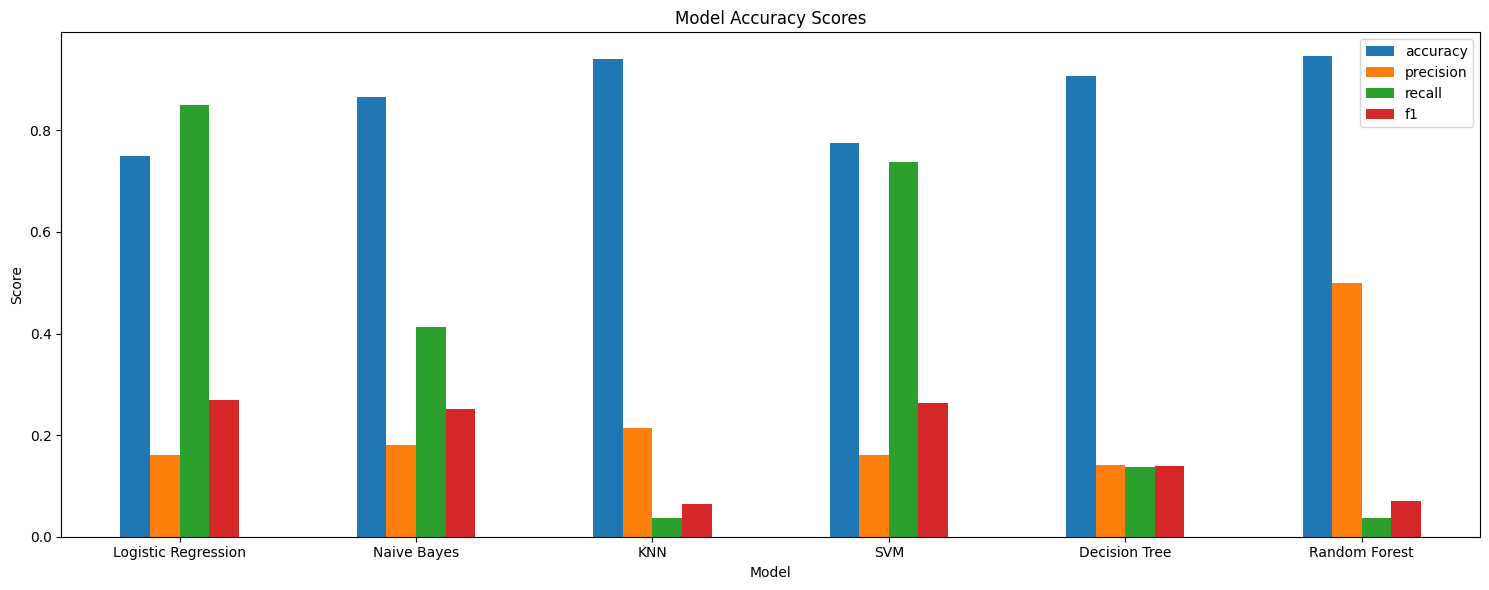

In [48]:
Final_accuracy.plot(kind='bar', figsize=(15, 6))
plt.title('Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Best Model: Random Forest


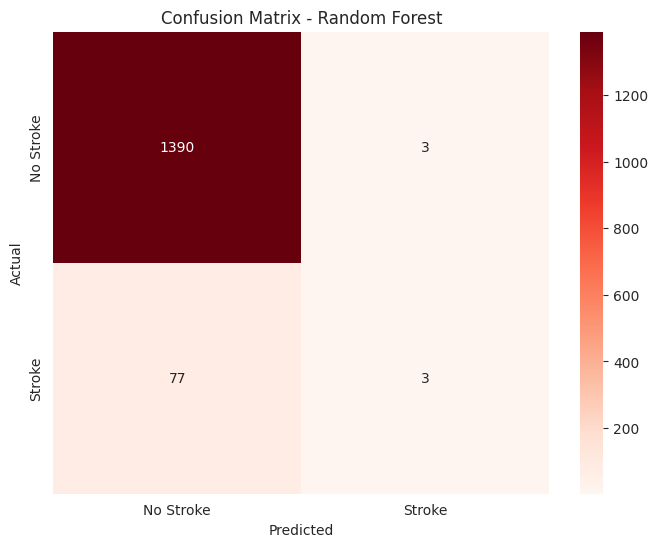

In [56]:
best_model_name = Final_accuracy["accuracy"].idxmax()

best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


y_pred_best_model = best_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred_best_model)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [50]:
print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best_model))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1393
           1       0.50      0.04      0.07        80

    accuracy                           0.95      1473
   macro avg       0.72      0.52      0.52      1473
weighted avg       0.92      0.95      0.92      1473

